<a href="https://colab.research.google.com/github/DHANUSHKUMMARI/DHANUSHKUMMARI/blob/main/Browsing_History_Analysis%20Of%20a%20User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np

In [35]:
import pandas as pd

In [36]:
# creating dataframe for user browsing history
df=pd.read_csv('/content/py_demo_client_extension_30_20250221075805 (1).csv',skiprows=5)
df.head()


,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21T07:57:38.017Z,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00


In [37]:
df.columns

Index(['OrgId', 'ParticipantId', 'DeviceId', 'url', 'eventtimeutc',
       'transition', 'title', 'visitId', 'referringVisitId', 'eventtime'],
      dtype='object')

In [38]:
df.shape

(5104, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrgId             5104 non-null   object
 1   ParticipantId     5104 non-null   object
 2   DeviceId          5104 non-null   object
 3   url               5104 non-null   object
 4   eventtimeutc      5104 non-null   object
 5   transition        5104 non-null   object
 6   title             5051 non-null   object
 7   visitId           5104 non-null   int64 
 8   referringVisitId  5104 non-null   int64 
 9   eventtime         5104 non-null   object
dtypes: int64(2), object(8)
memory usage: 398.9+ KB


## **Data Preprocessing:**##


---


---

1.Convert eventtimeutc to datetime format for time-based analysis.


---


2.Extract additional features: date, hour, and day_of_week to analyze trends.


---


3.Handle missing values in title by replacing them with "Unknown".


---


4.Extract domain names from URLs for domain-based analysis




In [40]:
# Convert eventtimeutc to datetime format
df['eventtimeutc'] = pd.to_datetime(df['eventtimeutc'])

# Extract useful time-based features
df['date'] = df['eventtimeutc'].dt.date
df['hour'] = df['eventtimeutc'].dt.hour
df['day_of_week'] = df['eventtimeutc'].dt.day_name()

# Handle missing values in title
df['title'].fillna("Unknown", inplace=True)

# Extract domain from URL
df['domain'] = df['url'].str.extract(r'https?://(?:www\.)?([^/]+)')

# Checking processed data
df.head()


<ipython-input-40-59f8af8c6dd1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna("Unknown", inplace=True)


,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime,date,hour,day_of_week,domain
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21 07:58:02.688000+00:00,link,Unknown,166328,0,2025-02-20T23:58:02-08:00,2025-02-21,7,Friday,NaN
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21 07:57:51.308000+00:00,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00,2025-02-21,7,Friday,chromewebstore.google.com
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.972000+00:00,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00,2025-02-21,7,Friday,py-insights.com
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.988000+00:00,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00,2025-02-21,7,Friday,py-insights.com
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21 07:57:38.017000+00:00,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00,2025-02-21,7,Friday,py-insights.com


**Key Metrics**

1. URl
2. Eventtimeutc
3. Transistion
4. Title

In [41]:
df['ParticipantId'].value_counts()

,count
ParticipantId,
demo,5104


In [46]:
df.domain.value_counts()

,count
domain,
google.com,1328
upwork.com,473
mail.google.com,149
pyinsightscom.sharepoint.com,140
loopnet.com,133
...,...
geediting.com,1
ticotimes.net,1
qksrv.net,1


In [81]:
websites=df['domain'].value_counts().to_dict()


print(websites)

{'google.com': 1328, 'upwork.com': 473, 'mail.google.com': 149, 'pyinsightscom.sharepoint.com': 140, 'loopnet.com': 133, 'eu-west-1.console.aws.amazon.com': 128, 'amazon.in': 123, 'wellfound.com': 107, 'zipair.net': 106, 'facebook.com': 104, 'gitlab.com': 71, 'accounts.google.com': 61, 'go.xero.com': 60, 'taskrabbit.com': 59, 'pyinsightscom-my.sharepoint.com': 52, 'docs.google.com': 50, 'zillow.com': 43, 'play.google.com': 41, 'app.powerbi.com': 40, 'tractorsupply.com': 33, 'homedepot.com': 32, 'mavenclinic.com': 31, 'instagram.com': 30, 'timeanddate.com': 30, 'behav-my.sharepoint.com': 29, 'bizquest.com': 29, 'onedrive.live.com': 25, 'teams.microsoft.com': 25, 'login.microsoftonline.com': 23, 'linkedin.com': 22, 'airasia.com': 22, 'instacart.com': 20, 'drive.google.com': 20, 'reporting.xero.com': 19, 'app.pinecone.io': 18, 'htmltemplates.co': 17, 'amazon.com': 17, 'py-insights.com': 17, 'chrome.google.com': 17, 'app.onemedical.com': 17, 'app.clickup.com': 17, 'en.m.wikipedia.org': 17,

##**Visualizations**##


---

1. Identify Top 10 websites visited and Visualize them
2. Analyse Browsing Trends by Hour
3. Analyse Browsing Trends by day of the week
4. Identify Top 5 transistions
5. Job search,Social Media and E-commerce website usage Analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
top_domains=df['domain'].value_counts().head(10)

print(top_domains)

domain
google.com                          1328
upwork.com                           473
mail.google.com                      149
pyinsightscom.sharepoint.com         140
loopnet.com                          133
eu-west-1.console.aws.amazon.com     128
amazon.in                            123
wellfound.com                        107
zipair.net                           106
facebook.com                         104
Name: count, dtype: int64


 ## **1. Visualizing Top 10 Websites**##

<ipython-input-72-585fc5f034d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.values,y=top_domains.index,hue=None,palette='plasma',legend=False)


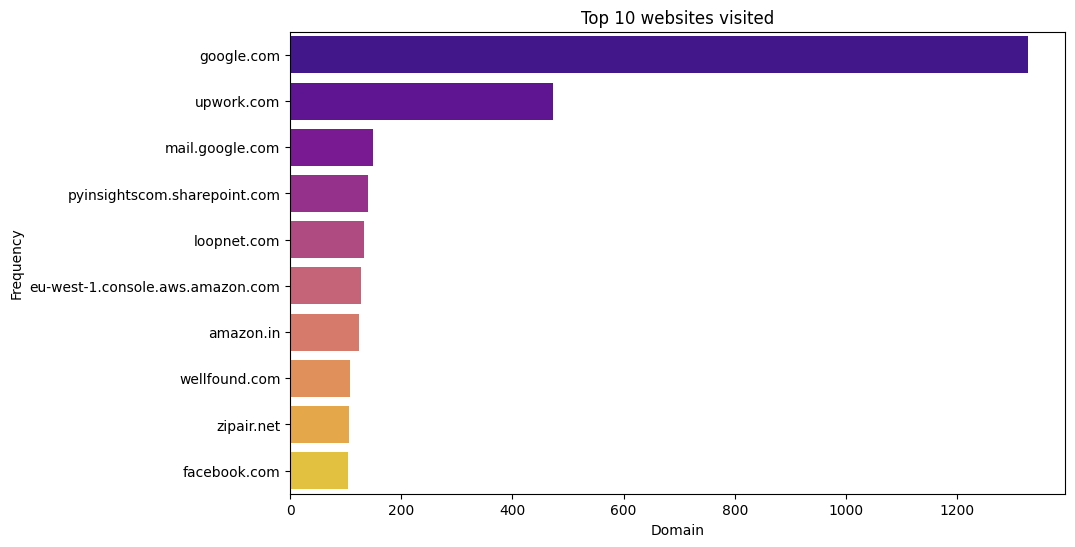

In [72]:
from pickle import NONE
# Plot top 10 websited using bar graph

plt.figure(figsize=(10,6))
sns.barplot(x=top_domains.values,y=top_domains.index,hue=None,palette='plasma',legend=False)
plt.title("Top 10 websites visited")
plt.xlabel("Domain")
plt.ylabel("Frequency")
plt.show()

## **2. Analyse Browsing Trends by Hour**

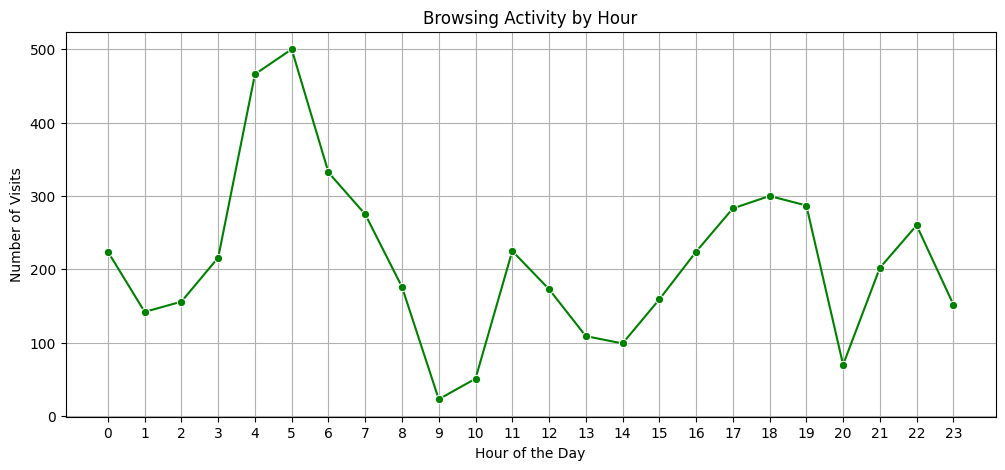

In [69]:
# Analyze browsing activity by hour
hourly_trends = df['hour'].value_counts().sort_index()

# Plot hourly trends
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, marker="o", color="green")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity by Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


##**3. Analyse Browsing Trends by day of the week**

Browsing Activity by Day of the Week:
day_of_week
Monday        721
Tuesday       624
Wednesday    1509
Thursday      852
Friday        546
Saturday      348
Sunday        504
Name: count, dtype: int64


<ipython-input-74-e07e34630a61>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_trends.index, y=daily_trends.values,hue_order=None, palette="Spectral",legend=False)


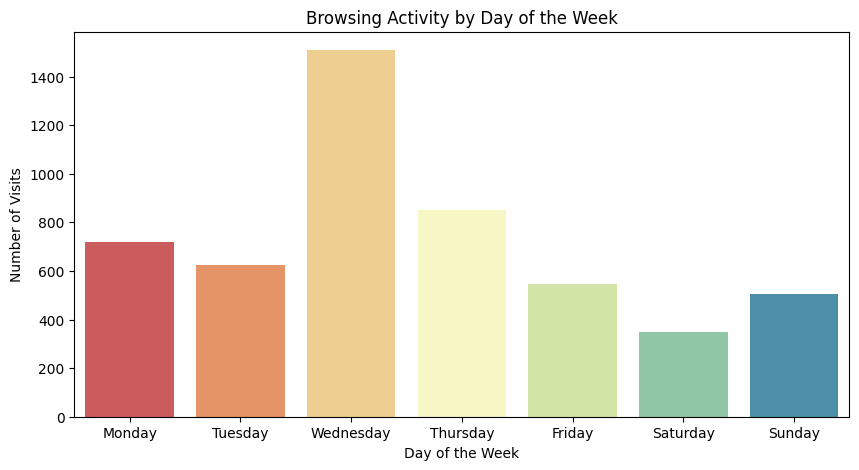

In [74]:
# Analyze browsing activity by day of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_trends = df['day_of_week'].value_counts().reindex(day_order)

# Display results
print("Browsing Activity by Day of the Week:")
print(daily_trends)

# Plot daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_trends.index, y=daily_trends.values,hue_order=None, palette="Spectral",legend=False)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity by Day of the Week")
plt.show()


##**4. Identify Top 5 transistions**

In [78]:
top_transitions = df['transition'].value_counts().head(5)

print(top_transitions)

transition
link             4098
reload            321
generated         259
form_submit       204
auto_toplevel     113
Name: count, dtype: int64


<ipython-input-79-bf7b2df51a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transitions.values,y=top_transitions.index,hue=None,palette='bright',legend=False)


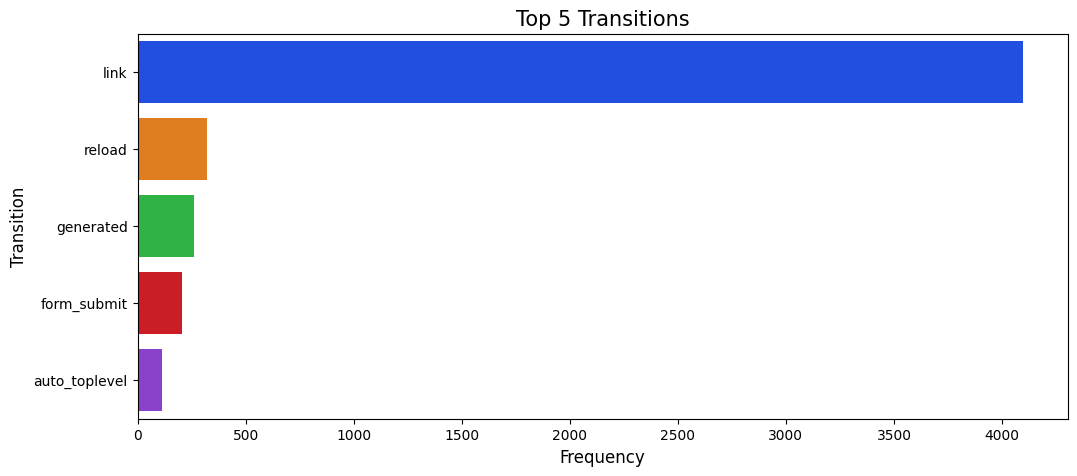

In [79]:
#Plot Transitions

plt.figure(figsize=(12,5))
sns.barplot(x=top_transitions.values,y=top_transitions.index,hue=None,palette='bright',legend=False)
plt.title('Top 5 Transitions',fontsize=15)
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Transition',fontsize=12)
plt.show()

##**5. Job search and E-commerce website usage Analysis**

In [88]:

job_search_sites = ["upwork.com", "wellfound.com", "linkedin.com",'internshala.com',"indeed.com","naukri.com","shine.com","glassdoor.com","microsoft.com"]
ecommerce_sites = ["amazon.in", "flipkart.com", "ebay.com","ajio.com","lenskart.com","mynthra.com","amazon.in","snapdeal.com","etsy.com"]
social_media_sites = ["facebook.com", "instagram.com", "twitter.com", "reddit.com", "linkedin.com","youtube.com","snapchat.com","x.com"]

# Creating a new column categorizing each website
df['category'] = df['domain'].apply(lambda x:
    'Job Search' if x in job_search_sites else
    'E-commerce' if x in ecommerce_sites else
    'Social Media' if x in social_media_sites else 'Other'
)

# Count visits per category
category_counts = df['category'].value_counts()

# Display the dictionary format
category_counts_dict = category_counts.to_dict()
print(category_counts_dict)


{'Other': 4196, 'Job Search': 606, 'Social Media': 161, 'E-commerce': 141}


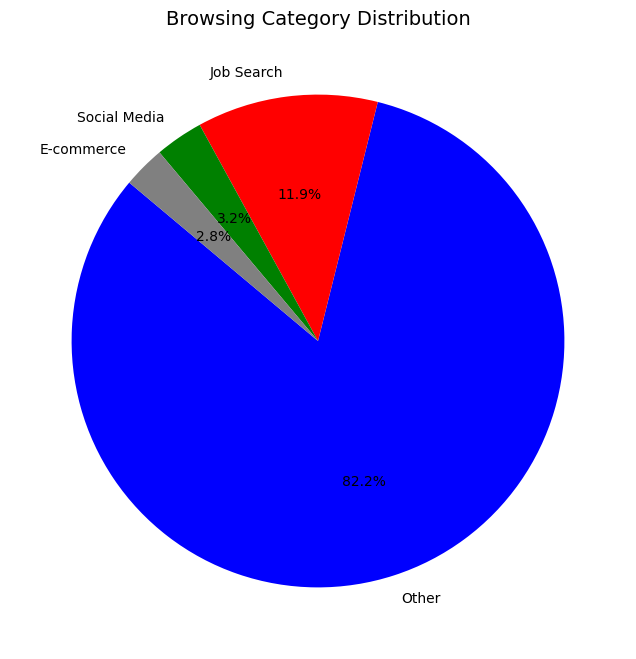

In [89]:
#Plot the category compostion
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'gray'], startangle=140)
plt.title("Browsing Category Distribution", fontsize=14)
plt.show()
